

# Project: Investigate a Dataset - [Movies]

## Table of Contents
<ul
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about 10,000+ movies collected from The Movie Database (TMDb), from 1960 to 2015. The dataset includes popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, revenue adj and budget adj.
The last two columns(revenue_adj, budget_adj) is the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
More information about the dataset can be found [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

### Questions for Analysis
- What type(genre) of movie has the highest revenue?
- Does release date influence revenue generated?
- What are the properties associated with movies with high revenue? 
- What movies generated the highest profit in any given year?
- Do movies with high budget generally have high rating?
 

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> Loading and viewing dataset, cleaning and fixing any data errors found

In [4]:
# Load data and print out a few lines
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#check for the size of data
df.shape

(10866, 21)

In [6]:
#checking for data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The data types are in order except for release date which is in string format and will be adjusted to date format. 
genres, imdb_id, production companies and director columns all fall short of 10866 entries which suggests that there is missing data

In [7]:
#check for total missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some columns contain missing data but not all of them are necessary for the analysis so they will be dropped

In [8]:
# Check for duplicate data
df.duplicated().sum()

1

In [9]:
# check for how many years the samples were taken
df.release_year.nunique()

56

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A close observation shows that most of the samples have zero budget and zero revenue which implies missing data, this should be handled.

However, maximum runtime is 900minutes which is strange, let's investigate

In [11]:
# find the row where the runtime is 900
max_time = df[df['runtime']== 900]
max_time

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


The movie with the highest runtime is _The Story of Film: An Odyssey_ a documentary(explains why runtime is 900mins) directed by _Mark Cousins_ and released in 2011


### Data Cleaning
> Removing duplicates, dropping irrelevant columns and fixing data types
 

In [12]:
# Drop duplicate
df.drop_duplicates(inplace=True)

# Check again to confirm if duplicate dropped successfully
df.duplicated().sum()

0

In [13]:
#dropping unnecessary columns
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview', 'production_companies'], axis =1, inplace = True)

In [14]:
#check again for missing data
df.isna().sum()


id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [15]:
#drop nan rows for genres
df.dropna(subset = ['genres'], inplace = True)

In [16]:
# convert datatype from string to datetime
df.release_date = pd.to_datetime(df.release_date, utc=True)

In [17]:
# confirm data types
df.dtypes

id                              int64
popularity                    float64
budget                          int64
revenue                         int64
original_title                 object
director                       object
runtime                         int64
genres                         object
release_date      datetime64[ns, UTC]
vote_count                      int64
vote_average                  float64
release_year                    int64
budget_adj                    float64
revenue_adj                   float64
dtype: object

In [18]:
# replace the missing values with the mean value 
df=df.mask(df==0).fillna(df.mean())

# confirm that there are no zero values in the columns
df[df.values == 0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [19]:
# check size of cleaned dataset
df.shape

(10842, 14)

<a id='eda'></a>
## Exploratory Data Analysis

Computations and visualizations that explore the questions stated earlier

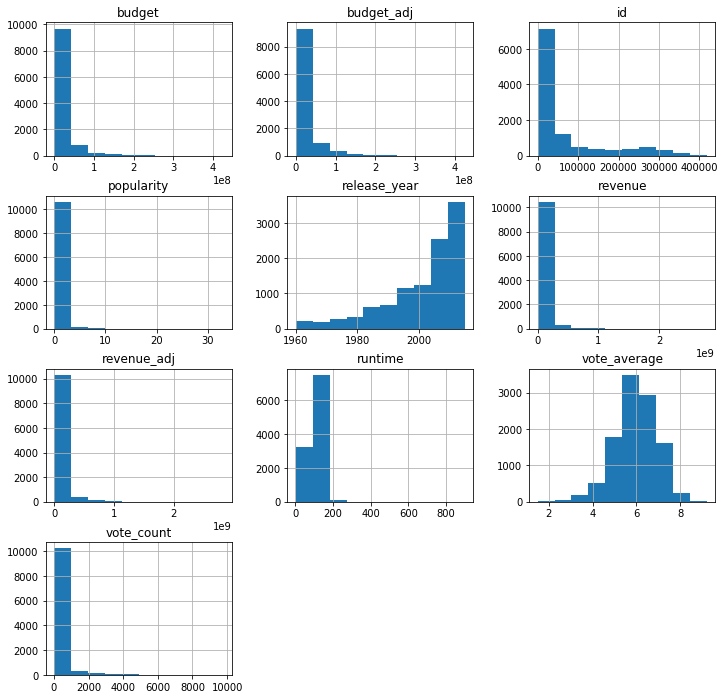

In [20]:
# View the distribution of the various columns
df.hist(figsize=(12,12));

Release year is skewed to the left while Average votes looks almost similar to a normal distribution

### What type(genre) of movie has the highest revenue?

In [21]:
# Observe summary statistics and get the value of the 75th percentile
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,2.232495e+07,6.197271e+07,102.421062,217.823649,5.974064,2001.314794,2.679108e+07,7.993283e+07
std,91981.355752,1.001032,2.803615e+07,1.111273e+08,30.828622,576.180993,0.934257,12.813617,3.053264e+07,1.366907e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.250000,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000,1.758712e+07,5.147797e+07
50%,20557.000000,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000,1.758712e+07,5.147797e+07
75%,75186.000000,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,5.147797e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
#create a sub dataset of movies with revenue values in the upper percentile
top_revenue = df.query('revenue >= 3.991138e+07')
top_revenue.sample(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1021,276496,0.302498,1.465531e+07,3.991138e+07,The Dark Horse,James Napier Robertson,124.0,Drama,2014-07-17 00:00:00+00:00,33,4.4,2014,1.758712e+07,5.147797e+07
5095,1550,0.379915,3.000000e+05,3.991138e+07,Pieces of April,Peter Hedges,81.0,Comedy|Drama,2003-01-19 00:00:00+00:00,28,6.3,2003,3.556058e+05,5.147797e+07
8709,9741,0.768576,7.500000e+07,2.481181e+08,Unbreakable,M. Night Shyamalan,106.0,Action|Fantasy|Thriller,2000-11-13 00:00:00+00:00,948,6.7,2000,9.497191e+07,3.141900e+08


In [23]:
# expanding the genres of the top_revenue sub dataset so that it shows more accurate representation of each genre
frequency = top_revenue['genres'].str.split('|').explode()
frequency.value_counts()

Drama              3337
Comedy             2837
Thriller           2144
Action             1846
Horror             1275
Romance            1187
Adventure          1177
Family             1050
Science Fiction     957
Crime               935
Fantasy             742
Animation           621
Mystery             574
Documentary         425
Music               293
History             254
War                 203
TV Movie            167
Foreign             158
Western             127
Name: genres, dtype: int64

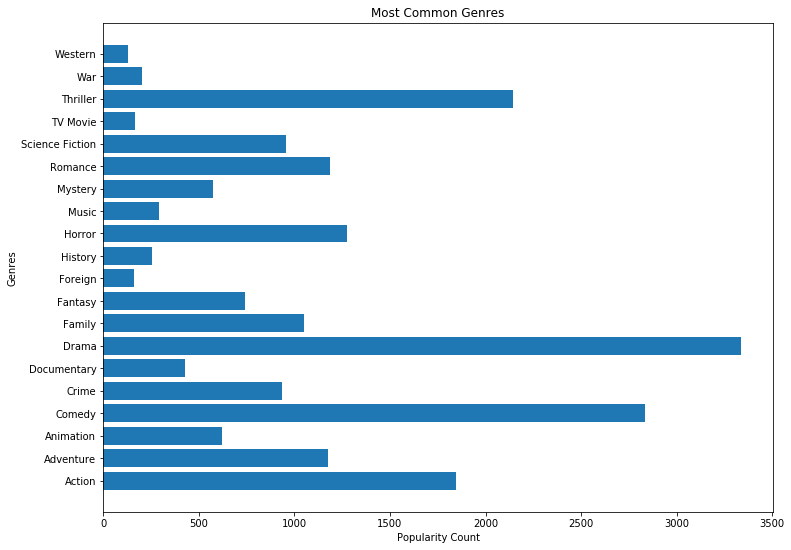

In [24]:
# Illustrate highest genre with bar chart
chart_df = pd.DataFrame(frequency.value_counts())
plt.subplots(figsize=(12,9))
plt.barh(chart_df.index,frequency.value_counts())
plt.title('Most Common Genres')
plt.xlabel('Popularity Count')
plt.ylabel('Genres');

The highest genre is Drama, followed by Comedy

### What relationship exists between release_date and revenue?
Does it matter what time of the year a movie is released?

In [25]:
# Extract the month from release_date and confirm it is in order
df['month'] = df['release_date'].dt.month
df.month.nunique()

12

In [26]:
#group revenue by month
monthly_revenue = df.groupby('month')['revenue'].mean()
monthly_revenue

month
1     4.091056e+07
2     4.995856e+07
3     6.011580e+07
4     5.575057e+07
5     8.407927e+07
6     9.475027e+07
7     7.757586e+07
8     4.894628e+07
9     4.098315e+07
10    4.962752e+07
11    7.854570e+07
12    7.947808e+07
Name: revenue, dtype: float64

June has the highest revenue. There is no clear pattern that shows that movies released towards the end of the year or beginning of the year have better revenue than others

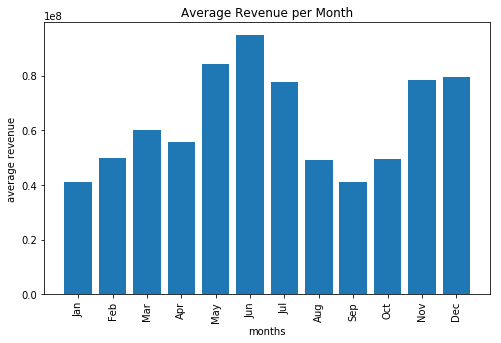

In [27]:
# Bar chart to illustrate the average revenue

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.subplots(figsize=(8, 5))
plt.bar(monthly_revenue.index, monthly_revenue)
plt.title('Average Revenue per Month')
plt.xticks(monthly_revenue.index, labels, rotation ='vertical')
plt.xlabel('months')
plt.ylabel('average revenue');



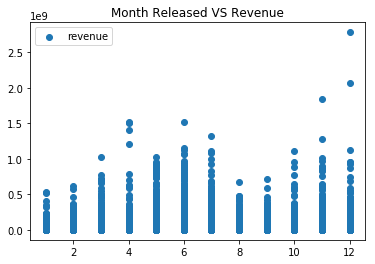

In [28]:
# showing relationship between release month and revenue
x = df.month
y = df.revenue
plt.scatter(x,y);
plt.title('Month Released VS Revenue');
plt.legend();

### What properties are associated with movies with high revenue?

In [29]:
#Extract values for where the revenue is above average and check summary statistics
high_revenue = df.query('revenue > revenue.mean()')
high_revenue.sample(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
6607,82,1.114239,135000000.0,163794509.0,Miami Vice,Michael Mann,134.0,Action|Adventure|Crime|Thriller,2006-07-27 00:00:00+00:00,283,5.7,2006,1.460253e+08,1.771715e+08,7
1461,13836,1.014706,50000000.0,106303988.0,Race to Witch Mountain,Andy Fickman,98.0,Adventure|Family|Fantasy|Science Fiction|Thriller,2009-03-12 00:00:00+00:00,308,5.4,2009,5.082002e+07,1.080474e+08,3
3915,1576,3.326646,33000000.0,102441078.0,Resident Evil,Paul W.S. Anderson,100.0,Horror|Action|Science Fiction,2002-03-15 00:00:00+00:00,1265,6.3,2002,4.000463e+07,1.241854e+08,3


In [30]:
high_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,1694.000000,1694.000000,1.694000e+03,1.694000e+03,1694.000000,1694.000000,1694.000000,1694.000000,1.694000e+03,1.694000e+03,1694.000000
mean,37622.314050,1.823714,6.013402e+07,2.213804e+08,113.455726,958.404368,6.308087,2002.704841,6.832760e+07,2.747652e+08,7.197757
std,65670.974594,1.947256,5.057351e+07,2.186606e+08,24.873575,1143.378918,0.729757,10.019014,5.160812e+07,2.668169e+08,3.348330
min,11.000000,0.010335,1.130000e+02,6.200000e+07,44.000000,10.000000,3.400000,1961.000000,2.248029e+02,5.711002e+07,1.000000
25%,2040.000000,0.855311,2.370000e+07,9.489611e+07,98.000000,257.250000,5.800000,1998.000000,2.885080e+07,1.130374e+08,5.000000
50%,9853.000000,1.305397,4.500000e+07,1.477491e+08,110.000000,549.500000,6.300000,2005.000000,5.526058e+07,1.818285e+08,7.000000
75%,38754.000000,2.117883,8.000000e+07,2.560219e+08,125.000000,1164.250000,6.800000,2010.000000,9.432801e+07,3.335704e+08,10.000000
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,12.000000


The average budget of movies with high revenue is 6.013402e+07, with average runtime 113mins and popularity 1.82, average vote 6.3

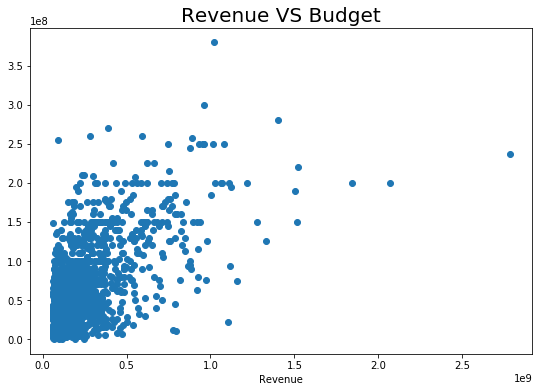

In [32]:
# check for relationships between revenue and other variables

def relate(x,y): # a function that plots relationship between revenue and other variables
    plt.figure(figsize = (9,6))
    plt.scatter(high_revenue[x], high_revenue[y]);
    plt.xlabel('Revenue', fontsize =10)
    if y == 'budget':
        plt.title('Revenue VS Budget', fontsize=20)
    elif y== 'vote_average':
         plt.title('Revenue VS Average Vote',fontsize=20)
    elif y== 'runtime':
         plt.title('Revenue VS Runtime', fontsize=20)
        
relate('revenue', 'budget')
        

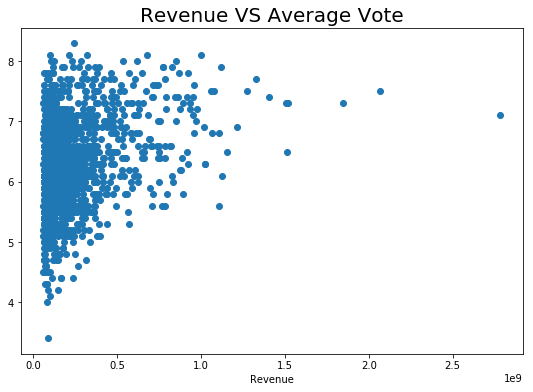

In [33]:
# check for relationship between revenue and average vote
relate('revenue', 'vote_average');

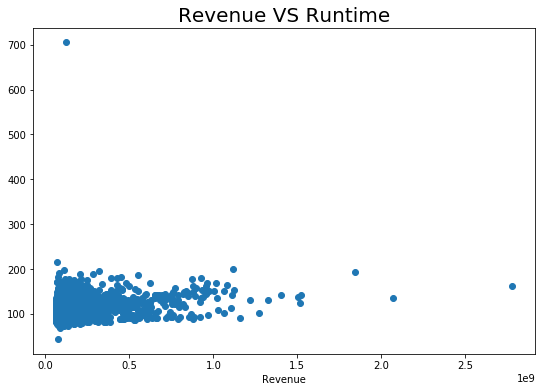

In [34]:
# Check for relationship between revenue and runtime
relate('revenue', 'runtime')

### What movies generated the highest profit in any given year?
Display chart of movies in a specified year

<Container object of 7 artists>

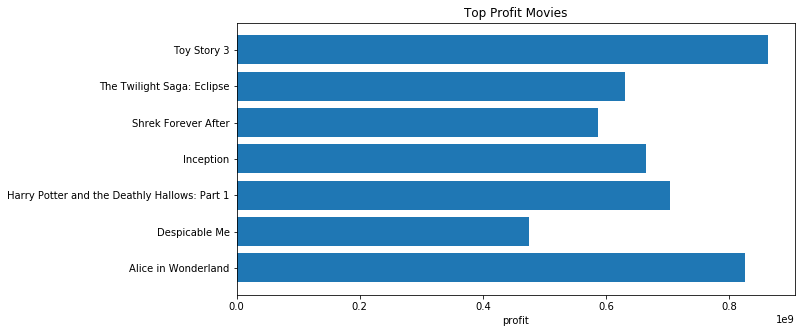

In [36]:
# function that displays movie profits in any given year

def profit(year=0):
    df['profit'] = df['revenue'] - df['budget']
    if year != 0 and year in df.release_year:
        querry = df.query('release_year == @year')
        sorted_querry = querry.sort_values(by='profit', ascending = False)
        plt.subplots(figsize=(10,5))
    plt.title('Top Profit Movies')
    plt.xlabel('profit')
    return plt.barh(sorted_querry.original_title.head(7), sorted_querry.profit.head(7));

#display chart of top profitable movies in 2010
profit(2010)

Most profitable movie in 2010 is _Toy Story 3_

<Container object of 7 artists>

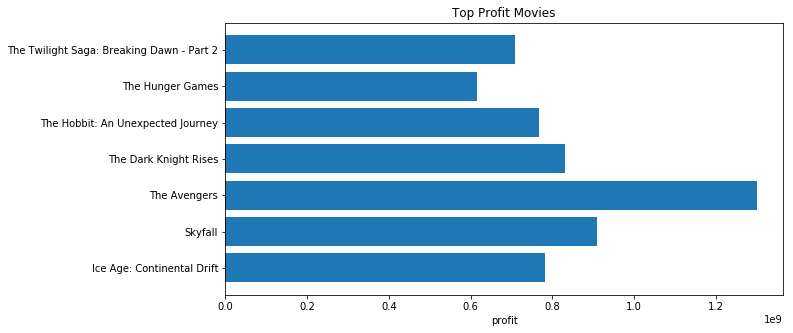

In [37]:
#display chart of top profitable movies in 2012
profit(2012)

Most profitable movie in 2012 is _The Avengers_

### Do movies with high budget generally have higher rating?

In [38]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09 00:00:00+00:00,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13 00:00:00+00:00,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18 00:00:00+00:00,2480,6.3,2015,1.012000e+08,2.716190e+08,3,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15 00:00:00+00:00,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01 00:00:00+00:00,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1.316249e+09


In [39]:
#Get the average budget amount
df.budget.mean()

22324948.15333229

In [40]:
#select samples with budget lower than average
low_budget = df.query('budget < 2232948')

#select samples with budget higher than average
high_budget = df.query('budget >= 2232948')

#Ensure that each sample is only counted once
total = low_budget['popularity'].count() + high_budget['popularity'].count()

#total should be same with number of rows(10842)
print(total)

10842


In [41]:
# Comparing mean votes of each revenue group
low_budget.vote_average.mean(), high_budget.vote_average.mean()

(5.950226928895612, 5.975611433061585)

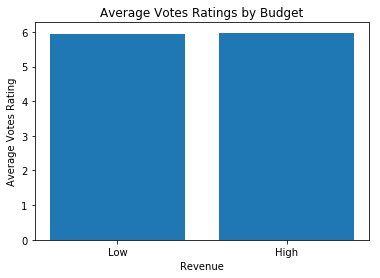

In [42]:
# illustrating with a bar chart
locations = [1, 2]
heights = [low_budget.vote_average.mean(), high_budget.vote_average.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Votes Ratings by Budget')
plt.xlabel('Revenue')
plt.ylabel('Average Votes Rating');

In [43]:
#compare mean popularity of each revenue group
low_budget.popularity.mean(), high_budget.popularity.mean()

(0.41870518608169427, 0.6623125039779981)

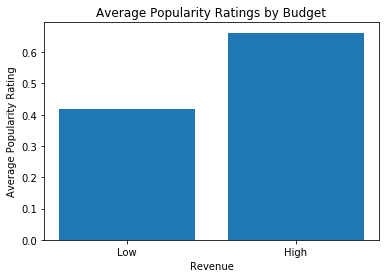

In [44]:
# Create a bar chart
locations = [1, 2]
heights = [low_budget.popularity.mean(), high_budget.popularity.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity Ratings by Budget')
plt.xlabel('Revenue')
plt.ylabel('Average Popularity Rating');

<a id='conclusions'></a>
## Conclusions

- The movie genre with highest revenue is Drama, followed by Comedy
- There is no evidence that release date affects revenue 
- Movies with revenue above average usually have budget of about 6Million, average runtime of 113mins and average vote rating of 6.3. It also appears there is a negative relationship between revenue and average vote
- In 2010, the movie _Toy Story 3_ generated the highest profit while in 2012, the movie _The Avengers_ generated the highest profit.
- Movies with high budget usually have higher rating compared to movies with lower budgets

### Limitations:
> Many movies fall into several categories of genres so there is a possible problem of data duplicity in trying to observe which particular genre generates highest revenue.

> At least half of the dataset have zero budgets even though they have revenue values which suggests that the values for the budgets might be missing and replacing the missing budgets might affect the accuracy and integrity of the data.

